<a href="https://colab.research.google.com/github/MavClarito/Old-stuffs/blob/main/Revised_Prelim_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**PRELIM EXAM** |
**Members:** | Clarito, Vincent Maverick
| Dayrit, Kristian Marc
**Section** | CPE32S9
**Date Performed**: | 02/29/2024
**Date Submitted**: | 03/05/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#**Goals:**

> Linear Regression
- Singular LR
- Multiple LR
- Polynomial LR
- Logistic Regression
- Decision Tree
- Random Forest
- Provide Evaluation reports for all models

**Data set**: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

**Sources**:
- https://www.w3schools.com/python/python_ml_multiple_regression.asp
- https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/LogisticRegression.ipynb#scrollTo=MTG1cHCdfYC0
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://www.w3schools.com/python/python_ml_polynomial_regression.asp
- https://tahera-firdose.medium.com/understanding-polynomial-regression-603eb25501d
- https://www.v7labs.com/blog/confusion-matrix-guide
- https://github.com/forouzanfallah/Polynomial-Linear-Regression-using-Python-on-Colab/blob/main/polynomial_regression_on_position_salaries.py

*Load & Install necessary modules & libraries*

In [ ]:
#!pip install six
#!pip install graphviz

In [ ]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics, linear_model
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
salaryFile = '/content/drive/My Drive/Datasets/salary.csv'
salaryDf = pd.read_csv(salaryFile)

In [ ]:
label_encoder = LabelEncoder()
salaryDf['salary'] = label_encoder.fit_transform(salaryDf['salary'])

<ipython-input-24-8b5608ed159a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salaryDf.corr(), annot=True, vmin = -1, vmax = 1, cmap='Blues')


<Axes: >

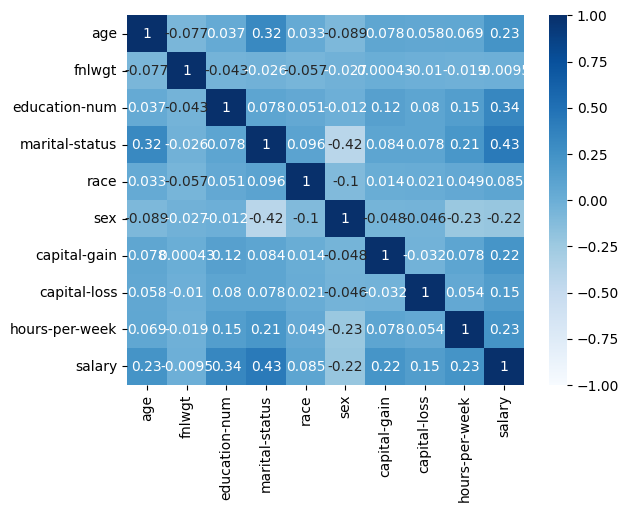

In [ ]:
sns.heatmap(salaryDf.corr(), annot=True, vmin = -1, vmax = 1, cmap='Blues')

In [ ]:
#In this block of code turn all necessary columns into binary since these columns are discrete values.

salaryDf['race'] = salaryDf['race'].apply(lambda toLabel: 1 if toLabel == ' White' else 0)
salaryDf['salary'] = salaryDf['salary'].apply(lambda toLabel: 0 if toLabel == ' <=50K' else (1 if toLabel == ' >50K' else None))
#salaryDf['capital-gain'] = salaryDf['capital-gain'].apply(lambda x: 1 if x != 0 else 0)
salaryDf['sex'] = salaryDf['sex'].apply(lambda toLabel: 0 if toLabel == ' Male' else 1)

mapping = {' Married-civ-spouse': 1, ' Divorced': 0, ' Never-married': 0, ' Separated': 0, ' Widowed': 0,
           ' Married-spouse-absent': 1, ' Married-AF-spouse': 1}

# Replace the values in the 'marital-status' column
salaryDf['marital-status'] = salaryDf['marital-status'].replace(mapping)

salaryDf.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,1,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,1,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,1,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,0,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,1,Exec-managerial,Wife,1,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,0,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,1,Exec-managerial,Husband,1,0,0,0,45,United-States,1


#**Singular LR**

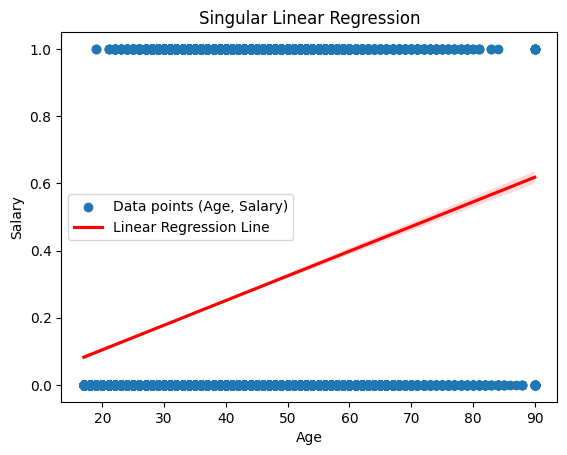

In [ ]:
#In this block of code we perform singular linear regression using seaborn and matplotlib to show the relationship of the two variables.
xAge = salaryDf['age']
ySalary = salaryDf['salary']

plt.scatter(xAge, ySalary, label='Data points (Age, Salary)')
sns.regplot(x=xAge, y=ySalary, line_kws={'color': 'red'}, scatter=False, label='Linear Regression Line')

plt.title('Singular Linear Regression')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='center left', frameon=True)
plt.show()

*Report*:
- This shows that there's a positive relationship between two variables.
- This also imply that older people tend to have higher salaries.

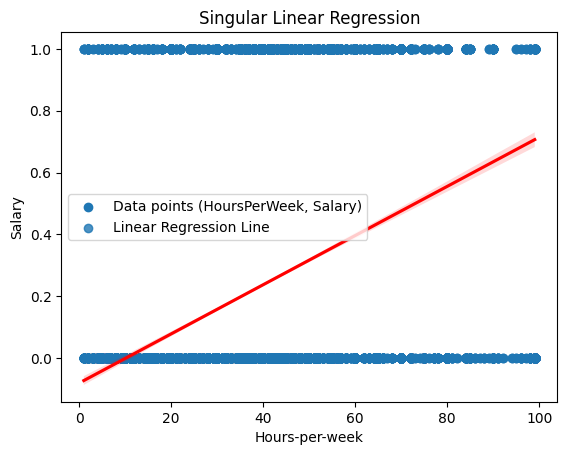

In [ ]:
#Same on this block but we used hours-per-week as our featured value.
xHpw = salaryDf['hours-per-week']
ySalary = salaryDf['salary']

plt.scatter(xHpw, ySalary, label='Data points (HoursPerWeek, Salary)')
sns.regplot( x= xHpw, y = ySalary, line_kws={'color': 'red'}, label='Linear Regression Line')

plt.title('Singular Linear Regression')
plt.xlabel('Hours-per-week')
plt.ylabel('Salary')
plt.legend(loc='center left', frameon=True)
plt.show()

*Report*:
- This shows that people who work more hours per week tend to have higher salaries.

In [ ]:
salary_counts = salaryDf['salary'].value_counts()
print(salary_counts)

0    24720
1     7841
Name: salary, dtype: int64


*Report*:
- 24,720 people has less than 50K USD salary.
- 7,841 people has more than 50K USD salary.
- This shows that age is directly proportional to salary and hours per week is also directly proportional to salary.

#**Multiple LR**

In [ ]:
#This block trains the featured model and predicts the values by computing its mean squared and Rsquared.
# Since our salary is binary coded, we used other columns to determine the relationship of other features.
xML = salaryDf[['education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'marital-status', 'race']]
yML = salaryDf['salary']

X_train, X_test, y_train, y_test = train_test_split(xML, yML, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.legend()
plt.show()

ValueError: could not convert string to float: ' Never-married'

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 400, 500, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 15],
    'criterion': ['gini', 'entropy']
    }

In [ ]:
r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

R-squared Score: -0.3136345300524406


*Report*:
- The upward trend of the first plot graph shows that there's a positive relationship between the actual and predicted values. As the actual values increase, the model tends to predict higher values.
- This multiple linear regression takes in multiple variables in regards to predicted and actual salary value/s.

#**Polynomial LR**

In [ ]:
salaryFile = '/content/drive/My Drive/Datasets/Position_Salaries.csv'
salaryDF = pd.read_csv(salaryFile)

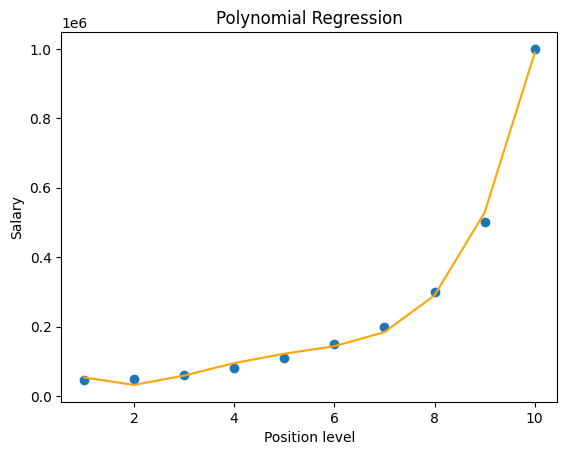

In [ ]:
#this block uses  polynomial regression with degree 4 on the 'Level' feature from our DataFrame to predict 'Salary'
# and visualizes the regression line along with the actual data points.
X = salaryDF[['Level']]
y = salaryDF['Salary']

lin_regressor = LinearRegression()
poly_regressor = PolynomialFeatures(degree = 4)
X_poly = poly_regressor.fit_transform(X)
poly_regressor.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, lin_reg_2.predict(X_poly), color = 'orange')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

*Report*:
- Since it shows an uptrend this means that theres a positive correlation between  the level and salary. Which means the higher position you get the higher the salary is.
- The code below shows the prediction of average salary regarding of position level such as shown below the average salary of the position level 3 is 58,642

In [ ]:
lin_reg_2.predict(poly_regressor.fit_transform([[3]]))

array([58642.1911421])

#**Logistic LR**

In [ ]:
#This block trains a linear regression model on the x variables and evaluates its performance using MSE and R-squared metrics.

xML = salaryDf[['education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'marital-status']]
yML = salaryDf['salary']

X_train, X_test, y_train, y_test = train_test_split(xML, yML, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


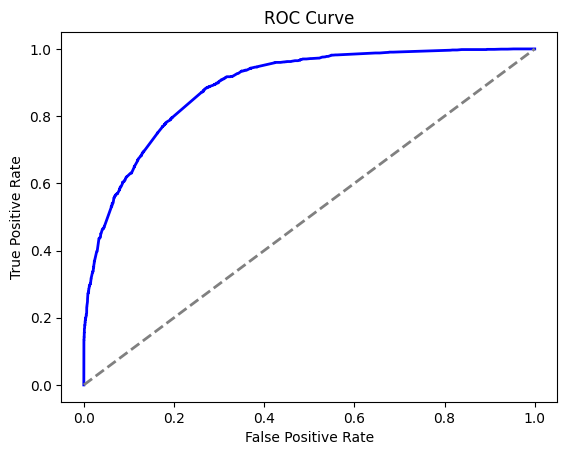

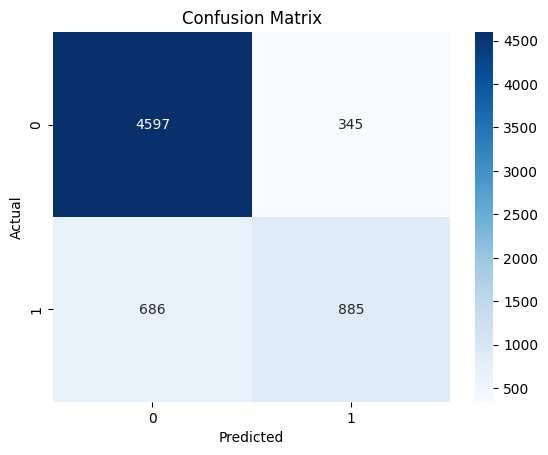

ROC AUC Score: 0.8892196584131495
Mean Squared Error: 0.12319367775431092
R-squared: 0.32691230541736016


In [ ]:
#This block is where it creates a visualization and evaluates the performance of the logistic regression model using ROC curve, ROC AUC score, and confusion matrix.

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_proba = logistic.predict_proba(X_test)[:,1]
y_pred = logistic.predict(X_test)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

In [ ]:
# Calculates the accuracy of the predicted values
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)

accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 84.17%


*Report:*
- This ROC curve shows that our classification model is predicting better values beyond just random guessing.
- The model is effectively distinguishing between the positive and negative classes
- ROC AUC Score of 0.889 indicates a strong performance of the model in distinguishing between classes.
- Mean Squared Error of 0.123 suggests the average squared difference between predicted and actual values is relatively low.
- R-squared value of 0.327 indicates that approximately 32.7% of the variance in the dependent variable is explained by the independent variables.

#**Decision Tree**

In [ ]:
# Correlate 5 variables to the dependent variable
y_target = salaryDf["salary"].values

columns = ["age", "education-num", "capital-gain", "hours-per-week", "sex"]
X_input = salaryDf[list(columns)].values

clf_salary = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_salary = clf_salary.fit(X_input, y_target)


In [ ]:
clf_salary

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf_score = clf_salary.score(X_input,y_target)
percentage = "{:.0%}".format(clf_score)
print(percentage)

80%


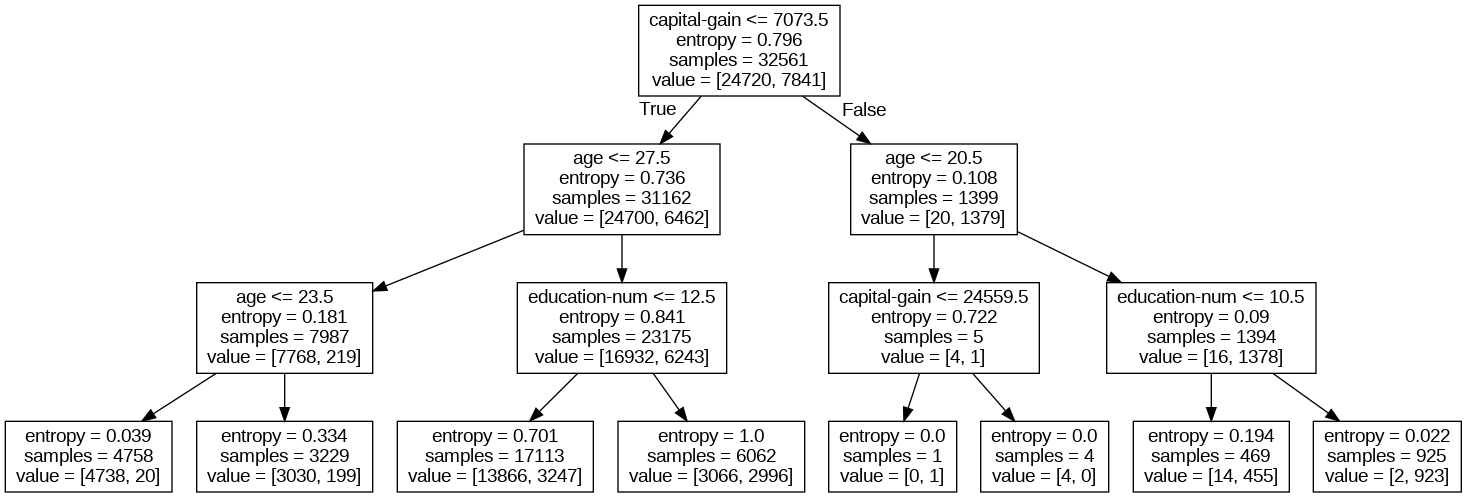

In [ ]:
with open('/content/drive/My Drive/Datasets/salary.dot', 'w') as f:
  f = tree.export_graphviz(clf_salary, out_file=f, feature_names=columns)
# Convert the intermediate file to a graphic
!dot -Tpng /content/drive/MyDrive/Datasets/salary.dot -o /content/drive/MyDrive/Datasets/salary.png
# Display the decison tree graphic
Image('/content/drive/MyDrive/Datasets/salary.png')

*Report:*

- People who has a capital gain of less than or equal to 7073.5 are aged between 21 & 27

- People aged less than 20 has greater capital gain than people who are older than them. (Profit from sale)

- People aged less than 20 works 36 hours per week





#**Random Forest**

In [ ]:
Xsa = salaryDf[['age']]
ysa = salaryDf['salary']

X_train, X_test, y_train, y_test = train_test_split(Xsa, ysa, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Accuracy = "{:.0%}".format(accuracy)
print(Accuracy)

Accuracy: 0.7612467372946415
76%


In [ ]:
rfc = RandomForestClassifier()

GV_RFC = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
GV_RFC.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 400, 500, 800]},
             scoring='accuracy')

In [ ]:
best_params = GV_RFC.best_params_
best_score = GV_RFC.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)

Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best score found:  0.7586762906888156


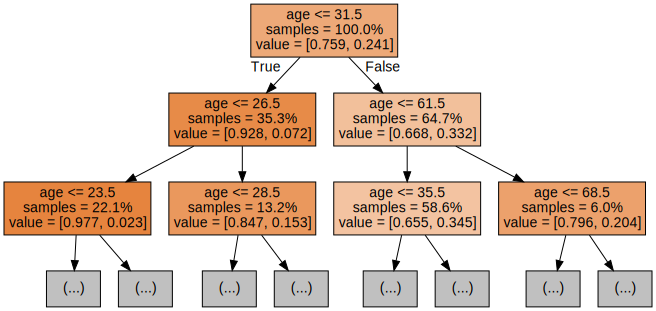

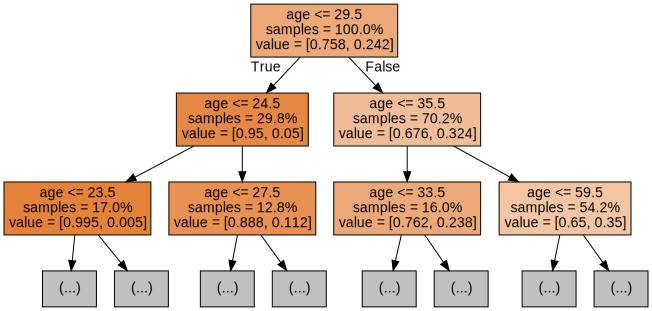

In [ ]:
# Export the first three decision trees from the forest

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**Report:**
- The expected accuracy correlates to 76% which is within the accepted / acceptable value.
- These values from random forest tells us True that 27.2% of the data sample ages are <= 24.5 and False where in ages are <= 35.5 so on so forth.
- The variable name and value used for splitting
- The % of total samples in each split
- The % split between classes in each split